# Trabajo No.4
## Modelo 1
#### integrantes:Jose Foronda y Alexa Paternina

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
df = pd.read_csv('datosenergeticos.csv', sep=',')

In [21]:
# Definir los datos en conjunto de entrenamiento y prueba
X = df.drop('Type_of_Renewable_Energy', axis=1)
y = df['Type_of_Renewable_Energy']

In [22]:
# Reducir el tamaño del dataset
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
# Construir un pipeline para el modelo SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])


In [19]:
# Definir los hiperparámetros para GridSearchCV
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 0.01, 0.001]
}


In [28]:
# Realizar búsqueda de hiperparámetros para SVM
svm_grid = GridSearchCV(svm_pipe, param_grid_svm, cv=3, error_score='raise')
try:
    svm_grid.fit(X_train, y_train)
except ValueError as e:
    print(f"Error al ajustar SVM: {e}")

In [31]:
  # Extraer los mejores parámetros y el  mejor modelo SVM
if hasattr(svm_grid, 'best_params_'):
    best_params_svm = svm_grid.best_params_
    best_model_svm = svm_grid.best_estimator_
    
    print("Mejores parámetros para SVM:", best_params_svm)
    print("Mejor modelo para SVM:", best_model_svm)

Mejores parámetros para SVM: {'svm__C': 0.1, 'svm__gamma': 0.1}
Mejor modelo para SVM: Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=0.1, gamma=0.1))])


In [40]:
y_pred_svm = best_model_svm.predict(X_test)

In [41]:
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine:
              precision    recall  f1-score   support

           1       0.15      0.46      0.23        59
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00        63
           5       0.15      0.72      0.25        57
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        64

    accuracy                           0.15       450
   macro avg       0.04      0.17      0.07       450
weighted avg       0.04      0.15      0.06       450



C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
train_sizes_svm, train_scores_svm, valid_scores_svm = learning_curve(best_model_svm, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)

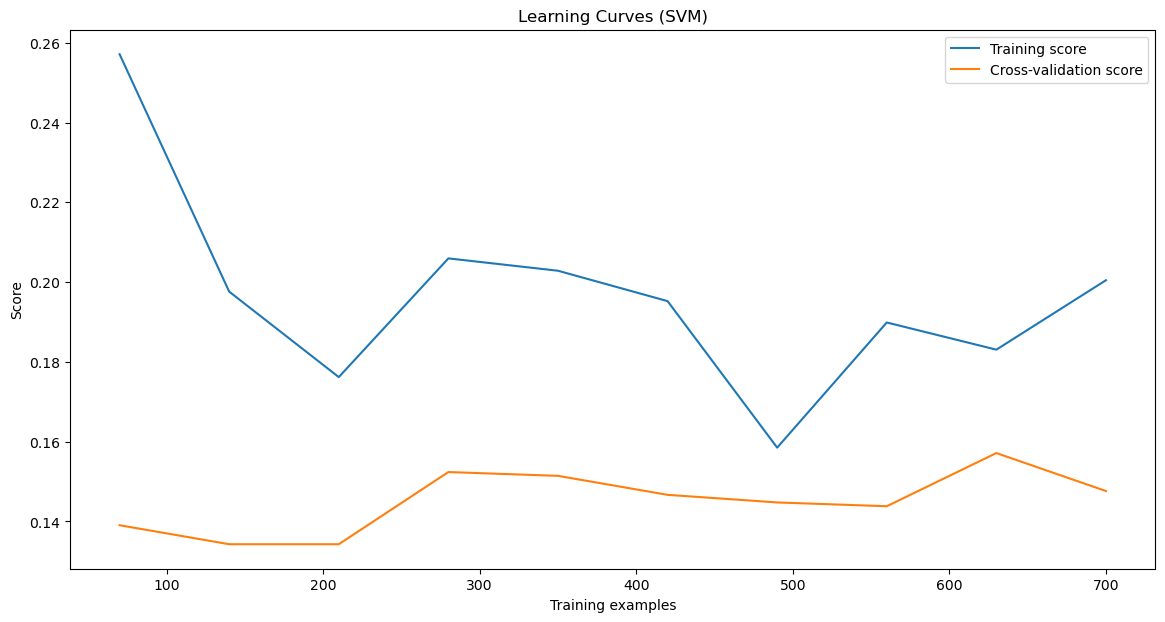

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(train_sizes_svm, np.mean(train_scores_svm, axis=1), label='Training score')
plt.plot(train_sizes_svm, np.mean(valid_scores_svm, axis=1), label='Cross-validation score')
plt.title('Learning Curves (SVM)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

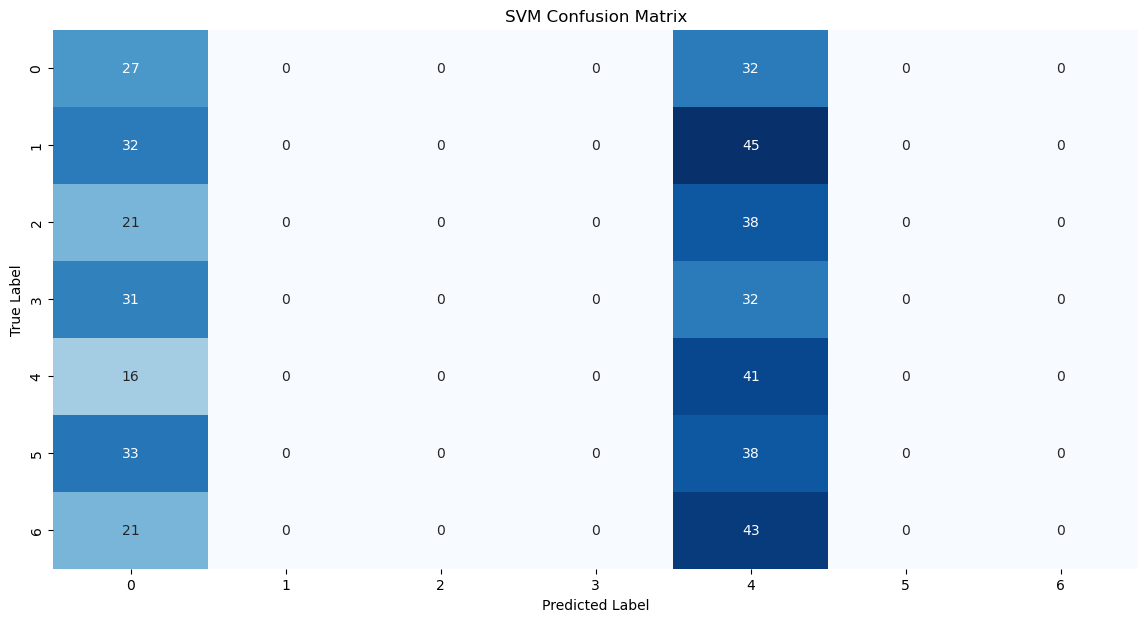

In [38]:
plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()